In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import time

In [15]:
df_schema_alignment = pd.read_json('output_alignment_multithread_finalpass/schema_mediato.json')
df_data_integration = pd.read_csv('output_integration/final_plt.csv')
df_data_augmentation = pd.read_csv('output_augmentation/dataset_finale.csv')

C:\Users\feder\AppData\Local\Temp\ipykernel_20964\3818830968.py:2: DtypeWarning: Columns (10,14) have mixed types. Specify dtype option on import or set low_memory=False.
  df_data_integration = pd.read_csv('output_integration/final_plt.csv')
C:\Users\feder\AppData\Local\Temp\ipykernel_20964\3818830968.py:3: DtypeWarning: Columns (10,14) have mixed types. Specify dtype option on import or set low_memory=False.
  df_data_augmentation = pd.read_csv('output_augmentation/dataset_finale.csv')


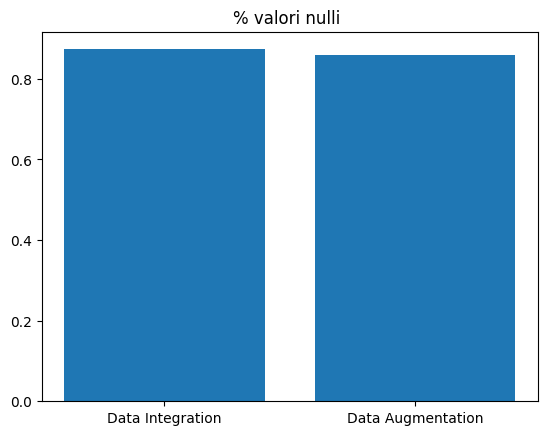

In [29]:
nullXColumn = {}
for column in df_schema_alignment.columns:
    nullXColumn[column] = [df_schema_alignment[column].isnull().sum() / len(df_schema_alignment), df_data_integration[column].isnull().sum() / len(df_data_integration), df_data_augmentation[column].isnull().sum() / len(df_data_augmentation)]
plt.title('% valori nulli ')
plt.bar(['Schema Alignment','Data Integration','Data Augmentation'], nullXColumn['stock'])
plt.show()